In [57]:
#Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams as rcP
%matplotlib inline

In [58]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [59]:
#Exploring the dataset
df.shape

(13320, 9)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [61]:
#Exploring the dataset
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [62]:
#Exploring the dataset
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
15-Nov                      2
15-Oct                      2
16-Dec                      4
16-Jan                      1
16-Jul                      1
16-Mar                      3
16-Nov                      1
16-Oct                      1
16-Sep                      2
17-Apr                      7
17-Aug                      9
17-Dec                     29
17-Feb                      2
17-Jan                      1
17-Jul                     12
17-Jun                     13
17-Mar                      5
17-May                      8
17-Nov                     12
17-Oct                     21
17-Sep                     11
18-Apr                    271
18-Aug                    200
18-Dec                    307
18-Feb                     62
                        ...  
20-Aug                     16
20-Dec                     

In [63]:
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [64]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [65]:
#Removing the columns of society
df = df.drop('society', axis='columns')
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Data Cleaning Process

In [66]:
#Data cleaning 
#checking the null values
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [67]:
#Applying median to the balcony and bath columns

from math import floor
balcony_median = float(floor(df.balcony.median()))
bath_median = float(floor(df.bath.median()))

df.balcony = df.balcony.fillna(balcony_median)
df.bath = df.bath.fillna(bath_median)

In [68]:
#checking the null values in the dataset again
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [69]:
# Dropping the rows with the null values because the dataset is huge as compared to the null values

df = df.dropna()
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [70]:
#Converting the size columns to bhk
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))
df = df.drop('size',axis = 'columns')
df.groupby('bhk')['bhk'].agg('count')

bhk
1      656
2     5528
3     4856
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [71]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [72]:
#Exploring the total_sqrt column
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [73]:
#Since the total_sqft contains the values such as 1133-1384,lets filter out these values:

def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [74]:
#Displaying all the rows that are not Integers
df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [75]:
#Converting the range values to integer values and removing otehr type of error

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [76]:
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft',axis='columns')
df.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0


In [77]:
#Removing the rows in new_total_sqft column that has the NONE values
df.isna().sum()

area_type          0
availability       0
location           0
bath               0
balcony            0
price              0
bhk                0
new_total_sqft    46
dtype: int64

In [78]:
df = df.dropna()
df.isna().sum()

area_type         0
availability      0
location          0
bath              0
balcony           0
price             0
bhk               0
new_total_sqft    0
dtype: int64

#### Feature Engineering

In [79]:
#Adding a new column of price_per_sqft
df1 = df.copy()

#In our dataset the price column is in lakhs
df1['price_per_sqft'] = (df1['price']*100000)/df['new_total_sqft']
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [80]:
#Checking unique values of 'Location' column
locations = list(df['location'].unique())
print(len(locations))

1298


In [81]:
#Removing the extra spaces at the end
df1.location = df1.location.apply(lambda x: x.strip())

#Calculating all the unique values in 'location' column
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                      538
Sarjapur  Road                                  397
Electronic City                                 304
Kanakpura Road                                  271
Thanisandra                                     236
Yelahanka                                       212
Uttarahalli                                     186
Hebbal                                          177
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Hennur Road                                     152
Bannerghatta Road                               151
7th Phase JP Nagar                              148
Haralur Road                                    142
Electronic City Phase II                        132
Rajaji Nagar                                    107
Chandapura                                      100
Bellandur                                        96
KR Puram                                         91
Hoo

In [82]:
#checking locations with less than 10 values
print(len(location_stats[location_stats<=10]), len(df1.location.unique()))

1047 1287


In [83]:
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [84]:
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [85]:
#Labelling the locations with less than or equal to 10 occurences to 'other'
location_less_than_10 = location_stats[location_stats<=10]

df1.location = df1.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df1.location.unique())

241

In [86]:
#checking the unique values in 'availability column'
df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

availability
Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
19-Dec             185
18-Jul             143
18-Mar             130
18-Jun              99
20-Dec              98
21-Dec              93
19-Mar              86
18-Feb              62
18-Nov              47
18-Jan              42
18-Sep              41
19-Jun              40
18-Oct              39
19-Jan              39
19-Jul              36
17-Dec              29
20-Jan              24
17-Oct              21
19-Sep              21
22-Jun              19
19-Aug              18
21-Jun              17
20-Aug              16
19-Apr              16
19-Oct              15
                 ...  
22-Jan               6
21-Oct               6
20-Jul               5
17-Mar               5
21-Aug               5
20-Nov               4
20-May               4
16-Dec               4
20-Apr               4
21-Nov               3
19-Feb               3
16-Mar               

In [87]:
#Labelling the dates into Not Ready
dates = df1.groupby('availability')['availability'].agg('count')

dates_not_ready = dates[dates<10000]
df1.availability = df1.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

len(df1.availability.unique())

2

In [88]:
df1.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


In [89]:
#Checking the unique values in 'area_type' column
df1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

# Since the column has only few unique values, we don't perform any operation

area_type
Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

#### Removing the outliers

In [90]:
df2 = df1[~(df1.new_total_sqft/df1.bhk<300)]
print(len(df2),len(df1))

12513 13257


In [91]:
df2.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [92]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    
    for key, sub_df in df.groupby('location'):
        m = np.mean (sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
print(len(df2), len(df3))

12513 10288


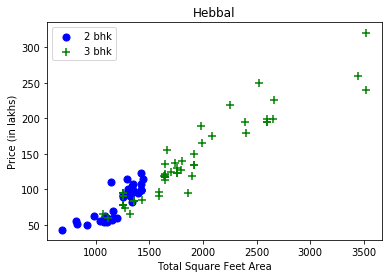

In [93]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location) & (df.bhk ==3)]
    rcP['figure.figsize'] ==(15,10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.new_total_sqft,bhk3.price,color='green', marker='+',label='3 bhk',s =50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in lakhs)')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df3,'Hebbal')

In [94]:
#Here we observe that 3BHK cost that same as 2 BHK in 'Hebbal' location hence such outliers is necessary

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))

10288 7342


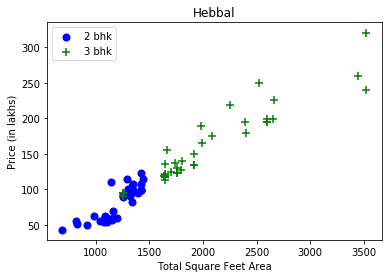

In [95]:
plot_scatter_chart(df4,'Hebbal')

Text(0, 0.5, 'Count')

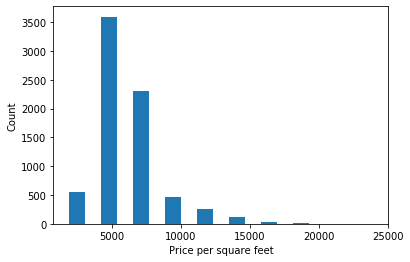

In [96]:
plt.hist(df4.price_per_sqft,rwidth=0.5)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

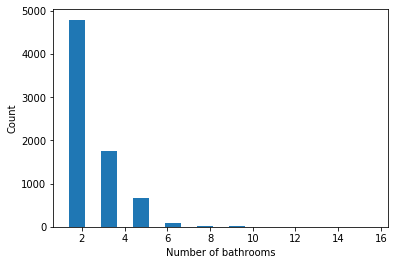

In [97]:
plt.hist(df4.bath,rwidth=0.5)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [98]:
#Removing the rows that have 'bath' greater than 'bhk+2'
df5 = df4[df4.bath<(df4.bhk+2)]
print(len(df4),len(df5))

7342 7264


In [99]:
df5.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,Not Ready,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0,12533.333333
3,Built-up Area,Not Ready,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,Not Ready,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0,11983.805668


#### Model Building

In [100]:
#Removing the unnecessary columns (columns that were added only for removing the outliers)
df6 = df5.copy()
df6 = df6.drop('price_per_sqft',axis = 'columns')

In [101]:
df6.head()

,area_type,availability,location,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,Not Ready,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0
1,Super built-up Area,Not Ready,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0
3,Built-up Area,Not Ready,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0
4,Super built-up Area,Not Ready,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0


In [102]:
#Converting the categorical_value into the numerical_values using get_dummies method

dummy_cols = pd.get_dummies(df6.location).drop('other',axis='columns')
df6 = pd.concat([df6,dummy_cols],axis='columns')

In [103]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready',axis='columns')
df6 = pd.concat([df6,dummy_cols],axis='columns')

In [104]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [105]:
df6.drop(['area_type','availability','location'],axis='columns',inplace=True)
df6.head()

,bath,balcony,price,bhk,new_total_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move,Built-up Area,Carpet Area,Plot Area
0,4.0,1.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,0.0,130.0,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,2.0,148.0,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df6.shape

(7264, 249)

In [107]:
#Splitting the dataset into features and label
X = df6.drop('price',axis='columns')
y = df6['price']

In [108]:
#Using GridSearchCv to find the best algorithms for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [110]:
# Creating a function for GridSearchCV

def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 569, in fit
    linalg.lstsq(X, y)
  File "C:\Users\swati bansal\AppData\Roaming\Python\Python37\site-packages\scipy\linalg\basic.py", line 1223, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.82072443]
  cate

,model,best_parameters,accuracy
0,linear_regression,{'normalize': False},0.820724
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.664478
2,decision_tree,"{'criterion': 'mse', 'splitter': 'random'}",0.707240


#### Since the linear Regression has the highest accuracy, the model selected for this problem is linear Regression

In [111]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=20)

In [112]:
#Creating Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [115]:
model.score(X_test,y_test)

0.8610503675314692

In [116]:
#predicting the values using our trained model
X.columns

Index(['bath', 'balcony', 'bhk', 'new_total_sqft', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Ready To Move', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area'],
      dtype='object', length=248)

In [118]:
#For finding the appropriate location
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

6

In [122]:
#For finding the appropriate area_type
np.where(X.columns=='Built-up  Area')[0][0]

245

In [123]:
#For finding the appropriate availablitity
np.where(X.columns=='Ready To Move')[0][0]

244

In [136]:
#Creating a function to predict values

def prediction(location,bhk,bath,balcony,sqft,area_type,availability):
    
    loc_index,area_index,avail_index = -1,-1,-1
    
    if location!= 'other':
        loc_index = int(np.where(X.columns==location)[0][0])
    
    if area_type!='Super built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]
    
    if availability!='Not Ready':
        avail_index = np.where(X.columns==availability)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft
    
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1
    return model.predict([x])[0]


In [137]:
#Prediction1
#Input in the form: location BHL, Bath, Balcony,Sqft,area_type,availablity
prediction('1st Block Jayanagar',2,2,2,1000,'Built-up  Area','Ready To Move')


173.59653593441396

In [138]:
# Prediction 2
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability
prediction('1st Phase JP Nagar', 2, 2, 2, 1000, 'Super built-up  Area', 'Ready To Move')

88.43189145471842

In [139]:
# Prediction 3
# Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability
prediction('1st Phase JP Nagar', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

186.32620319687436